# Simple Machine Learning Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-25,155.479996,158.130005,154.320007,157.759995,157.086288,33535500
2019-01-28,155.789993,156.330002,153.660004,156.300003,155.632523,26192100
2019-01-29,156.250000,158.130005,154.110001,154.679993,154.019440,41587200
2019-01-30,163.250000,166.149994,160.229996,165.250000,164.544296,61109800
2019-01-31,166.110001,169.000000,164.559998,166.440002,165.729218,40739600


In [4]:
# Create Data
df['Open_Close'] = (df['Open'] - df['Adj Close'])/df['Open']
df['High_Low'] = (df['High'] - df['Low'])/df['Low']
df['Increase_Decrease'] = np.where(df['Volume'].shift(-1) > df['Volume'],1,0)
df['Buy_Sell_on_Open'] = np.where(df['Open'].shift(-1) > df['Open'],1,0)
df['Buy_Sell'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'],1,0)
df['Returns'] = df['Adj Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900,0.020704,0.015062,0,1,1,-0.000174
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600,0.016212,0.008078,1,1,1,0.004645
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000,0.010175,0.013406,0,1,0,0.011385
2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800,0.018998,0.009659,1,1,0,-0.003714
2018-01-09,174.550003,175.059998,173.410004,174.330002,171.018005,21584000,0.020235,0.009515,1,0,0,-0.000115


In [5]:
df.shape

(271, 12)

In [6]:
X = np.array(df['Open']).reshape(271,-1)
Y = np.array(df['Adj Close']).reshape(271,-1)

Use Sklearn Machine Learning Library

In [7]:
from sklearn.linear_model import LinearRegression

Use Linear Regression Model because is the simplest model

In [8]:
lr = LinearRegression()

In [9]:
# Fit the model becasue it measure how well the machine learning model generalizes the data when is trained
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print('Estimate intercept coefficient:', lr.intercept_)
print('Number of coefficients:', len(lr.coef_))

Estimate intercept coefficient: [-0.96129428]
Number of coefficients: 1


In [20]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:', lr.score(X, Y))

Accuracy Score: 0.98579297029


In [11]:
# Predicting the price
lr.predict(X)

array([[ 170.64668433],
       [ 170.65662492],
       [ 171.55182417],
       [ 172.456965  ],
       [ 172.65589319],
       [ 171.27332251],
       [ 172.69567246],
       [ 174.27717234],
       [ 175.98798145],
       [ 174.24733365],
       [ 177.45012659],
       [ 176.69419409],
       [ 175.39119687],
       [ 175.39119687],
       [ 175.34146109],
       [ 172.616099  ],
       [ 170.1195177 ],
       [ 168.28935486],
       [ 163.68409314],
       [ 165.01692805],
       [ 165.3153278 ],
       [ 164.1515824 ],
       [ 157.28846277],
       [ 153.04127817],
       [ 161.2571298 ],
       [ 158.47209034],
       [ 155.26931232],
       [ 156.69166328],
       [ 160.12322309],
       [ 161.20739402],
       [ 167.92132124],
       [ 170.47759482],
       [ 170.16925348],
       [ 170.94508408],
       [ 169.92058951],
       [ 171.78059104],
       [ 174.44627677],
       [ 177.18158045],
       [ 177.34071445],
       [ 176.62456022],
       [ 170.9152454 ],
       [ 173.312

Text(0.5,1,'Prices vs Predicted Prices')

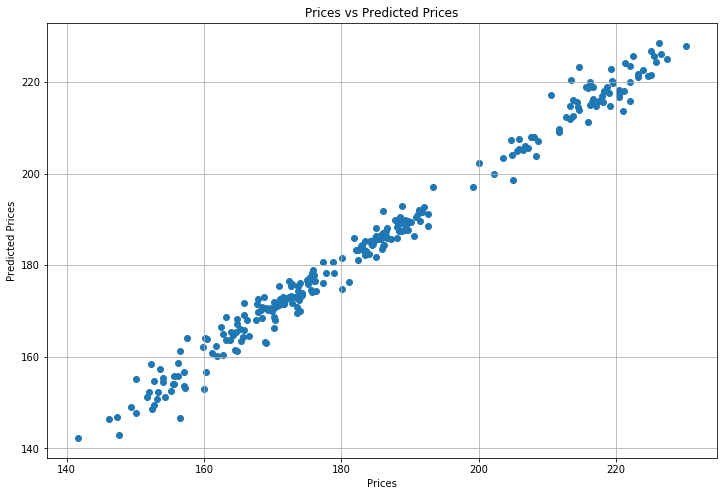

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(df['Adj Close'], lr.predict(X))
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.title('Prices vs Predicted Prices')